# Simulación numérica | Máquina de Atwood compuesta

[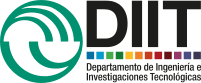](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Utilice el sistema de coordenadas indicadas.
Para este sistema de poleas determine: 
1. las ecuaciones de movimiento,
2. y las tensiones de ambas cuerdas utilizando el método de multiplicadores de Lagrange.

![Máquina de Atwood compuesta por dos poleas](figuras/marion_fig7_6.png)

## Análisis del problema
- Coordenadas generalizadas  
Si tomo la sugerencia de la figura podemos limitarnos a las coordenadas generalizadas indicadas como $x,y$.
Pero por uniformidad utilizaré todas $y_i$ con $i$ el del número de masa colgante o $p$ para la polea:
    - $y_1$ e $y_p$ se miden desde la posición vertical del centro de la polea superior,
    - $y_2$ e $y_3$ desde la posición vertical del centro de la polea inferior.
- Ligaduras:  
$$
y_1 + y_p + \pi R = l_1,
$$
e 
$$
y_2 + y_3 + \pi R = l_2,
$$
siendo $R$ el radio de las poleas.

## Calculando el Lagrangiano

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parámetros del sistema
R, m1, m2, m3, mp, g, l1, l2 = sym.symbols('R, m_1, m_2, m_3, m_p, g, l_1, l_2', positive=True)

# Coordenadas generalizadas 
t = sym.symbols('t') # tiempo
y1 = sym.Function('y_1')(t)
y2 = sym.Function('y_2')(t)
y3 = sym.Function('y_3')(t)
yp = sym.Function('y_p')(t)

# Ligaduras
f1 = y1+ yp + sym.pi* R - l1 # ligadura l1 como función homogénea
f2 = y2+ y3 + sym.pi* R - l2 # ligadura l2 como función homogénea
lambda1, lambda2 = sym.symbols('lambda_1, lambda_2')
f1, f2

Con dos funciones de ligadura se puede reducir en dos las coordenadas generalizadas.

In [3]:
yp_f1 = sym.Eq(yp, sym.solve(f1, yp)[0])
y3_f2 = sym.Eq(y3, sym.solve(f2, y3)[0])
yp_f1, y3_f2

In [4]:
# posiciones
N = mech.ReferenceFrame('N')
m1_r = y1* (-N.y)
m2_r = (yp_f1.rhs + y2) * (-N.y)
m3_r = (yp_f1.rhs + y3_f2.rhs)* (-N.y)
mp_r = yp_f1.rhs* (-N.y)
m1_r, m2_r, m3_r, mp_r

### Energía cinética

#### Energía cinética de traslación

In [5]:
# Energía cinética traslación
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m1_v = m1_r.diff(t, N)
m2_v = m2_r.diff(t, N)
m3_v = m3_r.diff(t, N)
mp_v = mp_r.diff(t, N)
T_traslación = unMedio *( 
    m1* m1_v.dot(m1_v) \
  + m2* m2_v.dot(m2_v) \
  + m3* m3_v.dot(m3_v) \
  + mp* mp_v.dot(mp_v) \
    )
T_traslación

#### Energía cinética de rotación

La energía cinética por la rotación de las poleas es

$$
\frac{I}{2} \omega^2
$$
Puesto que $\omega_i = \dot{\theta}_i = \frac{v_i}{R}$ y $v$ la velocidad tangencial que coincide con la de las masas que cuelgan, se puede escribir esta energía cinética en funcion de la $\dot{y}_i$

$$
\frac{I}{2} \left( \frac{\dot{y}_i}{R} \right)^2,
$$
siendo $R$ el radio de la polea.

Puesto que el montento de inercia de un cilíndro es $I = \frac{M}{2} R^2$, este término para la polea superior es

$$
\frac{I}{2} \dot{\theta_i}^2 = \frac{1}{2} \frac{M}{2} R^2 \left( \frac{\dot{y}_1}{R} \right)^2 = \frac{M}{4} \dot{y}_1^2,
$$
donde uso la coordenada de la masa izquierda $y_1$ en que $\dot{\theta_i}$ sería positivo.

Para la polea inferior
$$
\frac{M}{4} \dot{y}_2^2,
$$
pues uso la coordenada de la masa izquierda inferior $y_2$ en que $\dot{\theta_i}$ sería positivo.

In [6]:
# Energía cinética rotación
T_rotación = unMedio *( 
    mp/2* m1_v.dot(m1_v) \
  + mp/2* m2_v.dot(m2_v) \
    )
T_rotación

In [7]:
T = sym.Eq(sym.Symbol('T'), T_traslación + T_rotación ) # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

In [8]:
# Energía potencial
V = - (g* (-N.y) ).dot( \
         m1* m1_r \
       + m2* m2_r \
       + m3* m3_r \
       + mp* mp_r \
      )
V = sym.Eq(sym.Symbol('V'), V ).simplify()
V

### Lagrangiano

In [9]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs - V.rhs ) # Lagrangiano
L

### Ecuaciones de Euler-Lagrange

Puesto que los momentos generalizados se obtienen de 

$$
p_i = \frac{\partial}{\partial \dot{q_i}} \mathcal{L},
$$
se utiliza esto para dar nombre `dtdp` a la parte de la ecuación de Euler-Lagrange en que

$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = \frac{\mathrm{d}}{\mathrm{d}t} p_i$$
se deriva respecto al tiempo el momento generalizado $p_i$.

In [10]:
# derivada total respecto al tiempo de las parciales respecto a cada momento generalizado
y1_dtdp = L.rhs.diff(y1.diff(t)).diff(t) # primero deriva con x punto y luego con
y2_dtdp = L.rhs.diff(y2.diff(t)).diff(t) # primero deriva con x punto y luego con

De manera similar el derivar respecto a la coordenada generalizada

$$
\frac{\partial}{\partial q_i} \mathcal{L},
$$
se notara como `dq`.

In [11]:
# derivadas parciales respecto a las coordenadas generalizadas
y1_dq = L.rhs.diff(y1)
y2_dq = L.rhs.diff(y2)

Con ambos terminos se escriben las ecuaciones homegéneas (no hay fuerzas no conservativas)
$$
\frac{\partial}{\partial q_i} L
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} L
= 0
$$

In [12]:
y1_EL = sym.Eq(y1_dq - y1_dtdp, 0) # ecuación igualando a cero
y2_EL = sym.Eq(y2_dq - y2_dtdp, 0) # ecuación igualando a cero
y1_EL.simplify(), y2_EL.simplify()

### Resolución del sistema de ecuaciones de Euler-Lagrange

Con estas últimas tenemos un sistema de seis ecuaciones diferenciales lineales de segundo orden homogéneas.

In [13]:
sistemaEL = [
    y1_EL,
    y2_EL,
    ]
sistemaEL = [ecuación.expand() for ecuación in sistemaEL]
sistemaEL

In [14]:
ypp_funciones = [y1.diff(t,2), y2.diff(t,2)] # lista de las punto punto 
ypp_sol = sym.nonlinsolve(sistemaEL, ypp_funciones).args[0]
ypp_sol = [sol.expand().simplify() for sol in ypp_sol]

Y en `ypp_sol` se guardan las soluciones

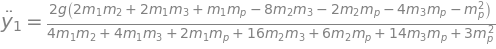

In [15]:
sym.Eq(ypp_funciones[0], ypp_sol[0])

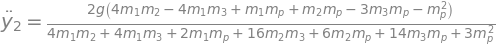

In [16]:
sym.Eq(ypp_funciones[1], ypp_sol[1] )

### Resolución del sistema de ecuaciónes en notación matricial

In [17]:
y_1pp, y_2pp = sym.symbols('\ddot{y}_1, \ddot{y}_2')
ypp_simbolos = [y_1pp, y_2pp] # símbolos muleto
muletosDiccionario = {
    ypp_funciones[0] : ypp_simbolos[0],
    ypp_funciones[1] : ypp_simbolos[1],
}

ecuaciones = [cadaEcuacion.expand() for cadaEcuacion in sistemaEL] # expand ayuda a la conversión en forma matricial
ecuacionesMuleto = [cadaEcuacion.subs(muletosDiccionario) for cadaEcuacion in ecuaciones]

A,b = sym.linear_eq_to_matrix(ecuacionesMuleto, ypp_simbolos )
sym.Eq(sym.MatMul(A, sym.Matrix(ypp_simbolos)), b) # esto presenta el sistema como igualdad matricial

⎡                                mₚ ⎤                                         
⎢-m₁ - m₂ - m₃ - 2⋅mₚ  m₂ - m₃ + ── ⎥                                         
⎢                                2  ⎥ ⎡\ddot{y}₁⎤   ⎡-g⋅m₁ + g⋅m₂ + g⋅m₃ + g⋅m
⎢                                   ⎥⋅⎢         ⎥ = ⎢                         
⎢              mₚ                 mₚ⎥ ⎣\ddot{y}₂⎦   ⎣       -g⋅m₂ + g⋅m₃      
⎢    m₂ - m₃ + ──      -m₂ - m₃ - ──⎥                                         
⎣              2                  2 ⎦                                         

  
  
ₚ⎤
 ⎥
 ⎦
  
  

Aprovechando las relaciones que provienen de $f_1$ y $f_2$ se puede todo a una dependencia de solo dos coordenadas generalizadas: $y_1$ y $y_2$.

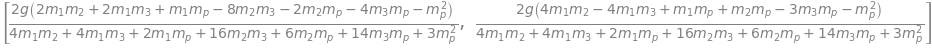

In [18]:
ypp_sol_matricial = A.solve(b)
ypp_sol_matricial = [x.simplify() for x in ypp_sol_matricial]
ypp_sol_matricial

Como forma de verificar que hicimos las cosas bien podemos comparar con una resolución en la que no se contempló $m_p$.
> Double Atwood Machine  
UCSC Physics Demonstration Room  
https://ucscphysicsdemo.sites.ucsc.edu/physics-5a6a/u/

Para esto establecemos $m_p =0$ en las soluciones.

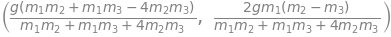

In [19]:
ypp_sol[0].subs(mp, 0).simplify(), ypp_sol[1].subs(mp, 0).simplify()

Puede verificarse que estas coinciden con las $\ddot{x}_1$ y $\ddot{x}_3$ que allí figuran.

## Resolución numérica

In [20]:
# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
magnitudes = {
    m1 : 1, # [kg]
    m2 : 2, # [kg]
    m3 : 3, # [kg]
    mp : 4, # [kg]
    g : 9.81, # [m s-2]
}

In [21]:
aceleraciones_numpy = [( sym.lambdify(t, x.subs(magnitudes) ) )(0) for x in ypp_sol]

Para esta ecuación diferencial de 2.o orden la integración numérica nos entregará un vector con la   coordenada y velocidades generalizadas.
Haremos dos vectores, uno pa $y_1$ y otro para $y_2$

$$
\left\{
\begin{array}{l}
\vec{v}_{10} = y_1 \\
\vec{v}_{11} = \dot{\vec{v}}_{10} = \dot{y}_1 \\
\end{array}
\right.
$$
y
$$
\left\{
\begin{array}{l}
\vec{v}_{20} = y_2 \\
\vec{v}_{21} = \dot{\vec{v}}_{20} = \dot{y}_2 \\
\end{array}
\right.
$$

Para obtenerlos lo alimentaremos con el que correspende a la derivada del mismo con velocidades y aceleraciones. Solo las últimas son dato:
$$
\left\{
\begin{array}{l}
\dot{\vec{v}}_{10} = \vec{v}_{11} \\
\dot{\vec{v}}_{11} = \ddot{y}_1 \\
\end{array}
\right.
$$
y
$$
\left\{
\begin{array}{l}
\dot{\vec{v}}_{20} = \vec{v}_{21} \\
\dot{\vec{v}}_{21} = \ddot{y}_2 \\
\end{array}
\right.
$$

In [22]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# vect_i : lista de estado con [x_0, x_1]
# c : lista de constates, en este caso las aceleraciones
# dx_dt : lista de derivadas
def derivaday1(t, vect_1):
    dy1dt = [vect_1[1], aceleraciones_numpy[0]]
    return dy1dt

def derivaday2(t, vect_2):
    dy2dt = [vect_2[1], aceleraciones_numpy[1]]
    return dy2dt

Ahora defino condiciones iniciales del sistema y el rango de tiempo a analizar 

In [23]:
# biblioteca de cálculo numérico general
import numpy as np

In [24]:
# parámetros para inicial las integración de sistemaDerivadas
t_rango = np.linspace(0,2, num= 100) # 100 tiempos entre 0 y 10 s
y1_inicial = [1,0] # parte del reposo y_1 = 1m
y2_inicial = [2,0] # parte del reposo y_2 = 2m

In [25]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
from scipy.integrate import solve_ivp

In [26]:
# E integrar de a pasos en el tiempo
sol_y1 = solve_ivp(derivaday1, (t_rango[0], t_rango[-1] ), y1_inicial, t_eval = t_rango)
sol_y2 = solve_ivp(derivaday2, (t_rango[0], t_rango[-1] ), y2_inicial, t_eval = t_rango)

## Graficación

In [27]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [28]:
def graficaFuncion(solucion, nombreCoordenada='q'):
    fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
    fig.suptitle('Integración numérica para '+ nombreCoordenada, fontsize=16)
    ax[0,0].plot(solucion.t, solucion.y[0]) # posición
    ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [m]', title='Posición')
    ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad
    ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [m/s]', title='Velocidad')

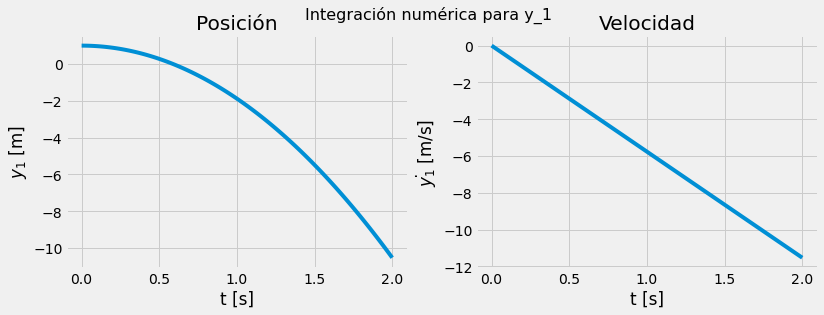

In [29]:
graficaFuncion(sol_y1, nombreCoordenada = 'y_1')

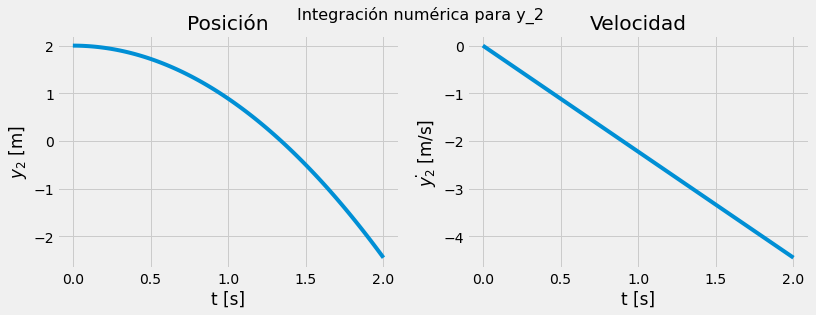

In [30]:
graficaFuncion(sol_y2, nombreCoordenada = 'y_2')